In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle
from matplotlib.path import Path
from dirac_sheet import dirac_sheet
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython import display

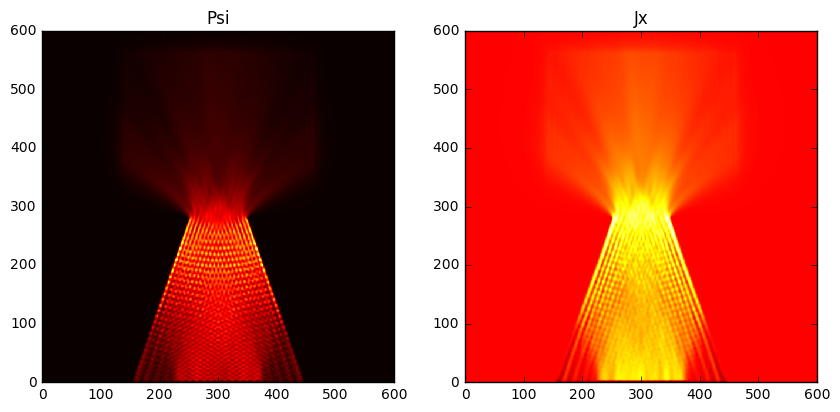

In [106]:
directory = "E:/pyDirac/collimator_output_full_absorb_2/"

psisum=np.zeros((13))
jxsum=np.zeros((13))
plt.ion()
fig = plt.figure(figsize=(10, 5), dpi=96, facecolor='w', edgecolor='k')

plt.clf()

for n,wave_vec in enumerate(np.linspace(.15,1.95,13,endpoint=True)):
    tic = time.time()

    fname=directory+'collimator_%03dEm3_wave_vec.npz' %(np.round(wave_vec*100))
    data=np.load(fname)

    psi=data['psi']
    jx=data['jx']
    
    psisum[n]=np.sum(psi[250:350,550])
    jxsum[n]=np.sum(jx[250:350,550])
    
    plt.subplot(1,2,1)
    plt.imshow(psi.T, cmap='hot',interpolation='nearest', origin='lower')
    plt.title('Psi')
    #cb1=plt.colorbar()
    ax=plt.gca()
    ax.set_ylim([0, 600])
    plt.subplot(1,2,2)
    plt.imshow(jx.T, cmap='hot',interpolation='nearest', origin='lower')
    plt.title('Jx')
    #cb2=plt.colorbar()
    ax=plt.gca()
    ax.set_ylim([0, 600])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #cb1.remove()
    #cb2.remove()

    display.clear_output(wait=True)

In [ ]:
from dirac_run import inPolygon
psis=np.zeros((psi.shape[0],psi.shape[1],13))

dx = .25
dt = 0.1
X_offset=112.5
myDirac=dirac_sheet(0,(901,601),dt,dx,X_offset,0)
x, y = myDirac.get_pos_mat()
NoPropMat = np.zeros(x.shape,dtype=np.uint8)
AbsMat = np.zeros(x.shape)
DriveMat=np.zeros(x.shape)
poly_verts = np.array([[0,37],[70,12.5],[70,1001],[0,1001],[0,37]])
poly_verts2 = np.array([[0,37],[70,12.5],[70,13.5],[0,38],[0,37]])

NoPropMat[inPolygon(poly_verts2,x,y)]=1
AbsMat[inPolygon(poly_verts,x,y)]=1
#mirror across x-axis and make CCW
poly_verts[:,1]*=-1
poly_verts[:,1]-=.125
poly_verts2[:,1]*=-1
poly_verts2[:,1]-=.125

poly_verts[:,:]=poly_verts[::-1,:]
poly_verts2[:,:]=poly_verts2[::-1,:]

NoPropMat[inPolygon(poly_verts2,x,y)]=1
AbsMat[inPolygon(poly_verts,x,y)]=1

AbsMat[x>140]=.99
AbsMat[(x>70)&(x<141)&(y>40)]=.99
AbsMat[(x>70)&(x<141)&(y<-40)]=.99
myDirac.set_No_prop_mat(NoPropMat)
myDirac.set_Absorb_mat(AbsMat)

temp=(~myDirac.rAu1)&(~myDirac.rNPu1)

In [208]:
from dirac_run import inPolygon
psis=np.zeros((psi.shape[0],psi.shape[1],13))

dx = .25
dt = 0.1
X_offset=112.5
myDirac=dirac_sheet(0,(901,601),dt,dx,X_offset,0)
x, y = myDirac.get_pos_mat()
NoPropMat = np.zeros(x.shape,dtype=np.uint8)
AbsMat = np.zeros(x.shape)
DriveMat=np.zeros(x.shape)
poly_verts = np.array([[0,37],[70,12.5],[70,1001],[0,1001],[0,37]])
poly_verts2 = np.array([[0,37],[70,12.5],[70,13.5],[0,38],[0,37]])

NoPropMat[inPolygon(poly_verts2,x,y)]=1
AbsMat[inPolygon(poly_verts,x,y)]=1
#mirror across x-axis and make CCW
poly_verts[:,1]*=-1
poly_verts[:,1]-=.125
poly_verts2[:,1]*=-1
poly_verts2[:,1]-=.125

poly_verts[:,:]=poly_verts[::-1,:]
poly_verts2[:,:]=poly_verts2[::-1,:]

NoPropMat[inPolygon(poly_verts2,x,y)]=1
AbsMat[inPolygon(poly_verts,x,y)]=1

AbsMat[x>140]=.99
AbsMat[(x>70)&(x<141)&(y>40)]=.99
AbsMat[(x>70)&(x<141)&(y<-40)]=.99
myDirac.set_No_prop_mat(NoPropMat)
myDirac.set_Absorb_mat(AbsMat)

temp=(~myDirac.rAu1)&(~myDirac.rNPu1)

for n,wave_vec in enumerate(np.linspace(.15,1.95,13,endpoint=True)):
    tic = time.time()

    fname=directory+'collimator_%03dEm3_wave_vec.npz' %(np.round(wave_vec*100))
    data=np.load(fname)

    psi=data['psi']
    psis[:,:,n]=psi
    
import scipy.io
out_arrays={}
out_arrays['x']=x
out_arrays['y']=y
out_arrays['AbsMat']=AbsMat
out_arrays['NoPropMat']=NoPropMat
out_arrays['psis']=psis

scipy.io.savemat('wave_function_data',out_arrays)

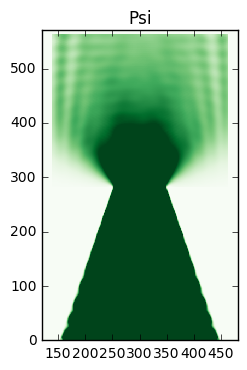

In [207]:
for n,wave_vec in enumerate(np.linspace(.15,1.95,13,endpoint=True)):
    n=3

    
    z_min, z_max = -0, 10000.0**1
    plt.imshow((temp.T*np.squeeze(psis[:,:,n]).T)**1, cmap='Greens',vmin=z_min, vmax=z_max,interpolation='nearest', origin='lower')
    plt.title('Psi')
    #cb1=plt.colorbar()
    ax=plt.gca()
    
    ax.set_ylim([0, 570])
    ax.set_xlim([121, 481])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #cb1.remove()
    #cb2.remove()
display.clear_output(wait=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in divide
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in multiply


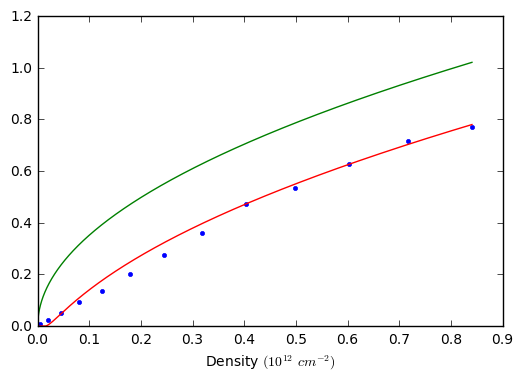

In [141]:
k_f=(np.linspace(.15,1.95,13,endpoint=True))/12
k_f2=(np.linspace(0,1.95,1000,endpoint=True))/12
n=k_f**2/np.pi*1E14/1E12
n2=k_f2**2/np.pi*1E14/1E12
G=(jxsum)*k_f/.46E6*2*np.pi
G2=(k_f2)*2*np.pi
L0=850 #nm
w0=300 #nm
G3=(w0>2*np.pi/k_f2)*G2*(np.sqrt(L0**2+(w0-2*np.pi/k_f2)**2)-L0)/(np.sqrt(L0**2+w0**2)-L0)
plt.plot(n,G,'.',n2,G2,n2,G3)
plt.xlabel('Density $(10^{12}$ $cm^{-2})$')
#,np.linspace(0,1.5,100,endpoint=True),np.linspace(0,1.5,100,endpoint=True)*100000)

In [138]:
import scipy.io
out_arrays={}
out_arrays['n']=n
out_arrays['n2']=n2
out_arrays['G']=G
out_arrays['G2']=G2
out_arrays['G3']=G3
scipy.io.savemat('conductance_sim_data',out_arrays)

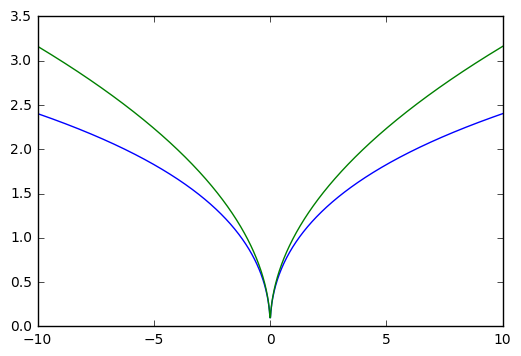

In [97]:
x=np.linspace(-10,10,1000,endpoint=True)
y=np.sqrt(np.abs(x))
plt.plot(x,1/(1/y+.1),x,y)

In [12]:
wave=np.linspace(.15,1.65,11,endpoint=True)
print 'collimator_%03dEm3_wave_vec.npz' %(np.round(wave[2]*100))

collimator_045Em3_wave_vec.npz


E:/pyDirac/collimator_output_full_absorb_2/collimator_195Em3_wave_vec


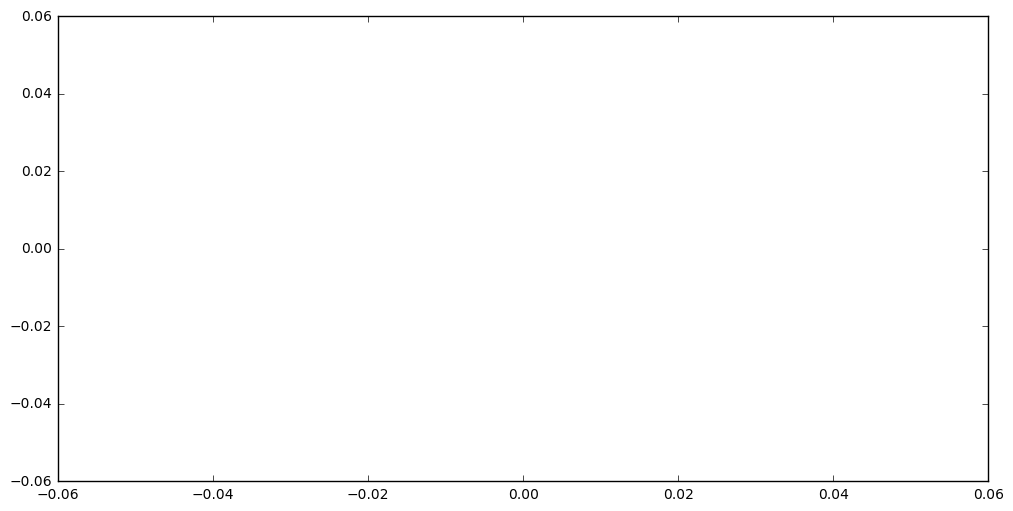

In [210]:
import collimator_random_phase
collimator_random_phase.main()